#Load necessary packages

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import random
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [50]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


#Data Sample

Image (#50): Which is digit '3'


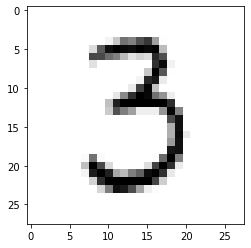

In [51]:
digit = 50 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

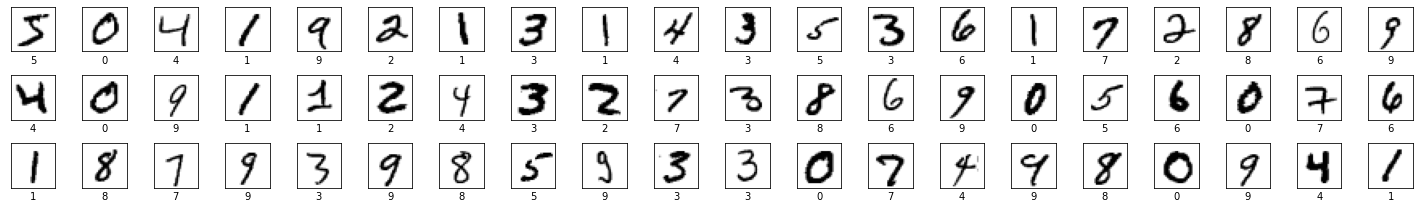

In [52]:
Row = 3
Coloum = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(Row):
    for c in range(Coloum):
        plt.subplot(Row, Coloum, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

#Normalise data

In [53]:
x_train = x_train.reshape(-1, 28,28,1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28,28,1).astype("float32") / 255.0

#CNN Model

In [54]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
  
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

#Compile The Model(SGD)

In [55]:
    model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
 )

#Train The Model

In [58]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0567 - accuracy: 0.9828 - val_loss: 0.0635 - val_accuracy: 0.9815
Epoch 2/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0538 - accuracy: 0.9837 - val_loss: 0.0630 - val_accuracy: 0.9826
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0703 - val_accuracy: 0.9781
Epoch 4/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0489 - accuracy: 0.9852 - val_loss: 0.0584 - val_accuracy: 0.9837
Epoch 5/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0579 - val_accuracy: 0.9827


#Ploting the Training Result(SGD)

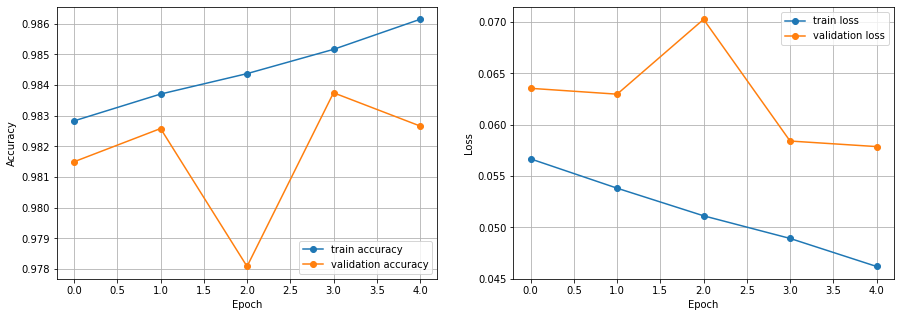

In [59]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.0421 - accuracy: 0.9862

Test Accuracy: 0.9861999750137329

Test Loss: 0.04214506223797798


#Compile The Model(ADAM)

In [61]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

#Train The Model

In [62]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0738 - accuracy: 0.9766 - val_loss: 0.0504 - val_accuracy: 0.9842
Epoch 2/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 3/5
750/750 [==============================] - 35s 47ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0371 - val_accuracy: 0.9893
Epoch 4/5
750/750 [==============================] - 37s 49ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0335 - val_accuracy: 0.9907
Epoch 5/5
750/750 [==============================] - 36s 47ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0345 - val_accuracy: 0.9900


#Ploting the Training Result(ADAM)

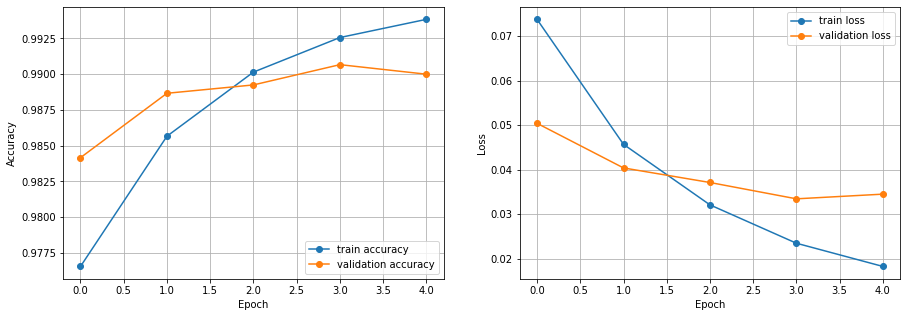

In [63]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.0284 - accuracy: 0.9914

Test Accuracy: 0.9914000034332275

Test Loss: 0.02838662452995777


#Compile The Model(RMSProp)



In [65]:
 model.compile(
     optimizer='rmsprop', 
     loss='sparse_categorical_crossentropy', 
     metrics=['accuracy']
 )

#Train The Model

In [66]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 47ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0452 - val_accuracy: 0.9886
Epoch 2/5
750/750 [==============================] - 36s 47ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0375 - val_accuracy: 0.9907
Epoch 3/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0528 - val_accuracy: 0.9902
Epoch 4/5
750/750 [==============================] - 36s 47ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0423 - val_accuracy: 0.9908
Epoch 5/5
750/750 [==============================] - 36s 48ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0521 - val_accuracy: 0.9907


#Ploting the Training Result(RMSProp)

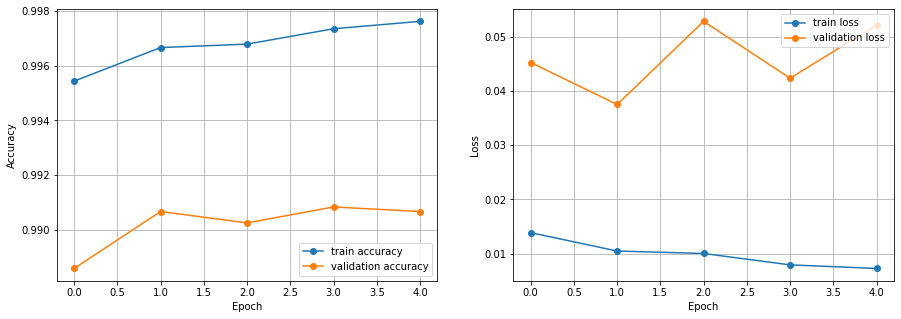

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

#Model Evaluation

In [68]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.0408 - accuracy: 0.9913

Test Accuracy: 0.9912999868392944

Test Loss: 0.04080318287014961
